### Import Libraries

In [8]:
import mlrose
import matplotlib.pyplot as plt 
import time 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
from textwrap import wrap

In [36]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.OneMax()

np.random.seed(17)

PROBLEM_SIZE = 50


max_iteration_list = list()
fitness_list_RHC = list()
fitness_list_SM = list()
fitness_list_GA = list()
fitness_list_MIMIC = list()
all_data = list()

runtime_RHC = list()
runtime_SM = list()
runtime_GA = list()
runtime_MIMIC = list()


# Define optimization problem object
problem = mlrose.DiscreteOpt(length = PROBLEM_SIZE, fitness_fn = fitness, maximize=True, max_val=2)

for MAX_ITER in range(100, 501, 50):  

    print("Running for max_iteration size: ", MAX_ITER)

#     # # Define decay schedule

    schedule = mlrose.ExpDecay(init_temp=0.4)

    np.random.seed(17)
    
    
    RHC_start = time.time()

    # Solve using random hill climbing
    best_state_RHC, best_fitness_RHC =  mlrose.random_hill_climb(problem, max_attempts=50, 
                                                                 max_iters=MAX_ITER, restarts=15, 
                                                                 init_state=None, curve=False, 
                                                                 random_state=None)
    RHC_end = time.time()
    SM_start = time.time()
    

    # Solve using simulated annealing 
    best_state_SM, best_fitness_SM = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 50, 
                                                          max_iters = MAX_ITER, init_state = None)


    SM_end = time.time()
    GA_start = time.time()
    
    # Solve problem using the genetic algorithm
    best_state_GA, best_fitness_GA = mlrose.genetic_alg(problem, pop_size=150, mutation_prob=0.15, max_attempts=20, 
                                                        max_iters=MAX_ITER, curve=False, random_state=None)

    GA_end = time.time()
    MIMIC_start = time.time()
    
    # Solve problem using mimic
    best_state_MIMIC, best_fitness_MIMIC = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                  max_iters=MAX_ITER, curve=False, random_state=None)
    
    MIMIC_end = time.time()
    
    
    
    # Append to each individual list 
    fitness_list_RHC.append(best_fitness_RHC)
    fitness_list_SM.append(best_fitness_SM)
    fitness_list_GA.append(best_fitness_GA)
    fitness_list_MIMIC.append(best_fitness_MIMIC)
    
    # Append Iteration size (For x-axis of our graph)
    max_iteration_list.append(MAX_ITER)
    
    # Apend runtime 
    runtime_RHC.append(RHC_end - RHC_start)
    runtime_SM.append(SM_end - SM_start)
    runtime_GA.append(GA_end - GA_start)
    runtime_MIMIC.append(MIMIC_end - MIMIC_start)
    
    # Append data to list (for dataframe later)
    all_data.append([MAX_ITER, best_fitness_RHC, best_fitness_SM, best_fitness_GA, best_fitness_MIMIC])
    

Running for max_iteration size:  100
Running for max_iteration size:  150
Running for max_iteration size:  200
Running for max_iteration size:  250
Running for max_iteration size:  300
Running for max_iteration size:  350
Running for max_iteration size:  400
Running for max_iteration size:  450
Running for max_iteration size:  500


In [23]:
print(best_state_SM)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]


### Plot Solution by each Algo

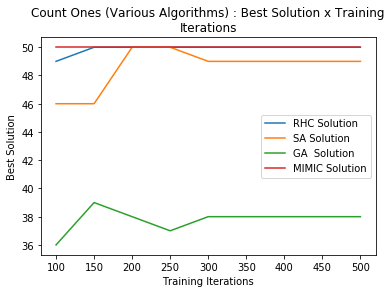

In [37]:
plt.figure()
title = "Count Ones (Various Algorithms) : Best Solution x Training Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iteration_list, fitness_list_RHC, '-', label='RHC Solution')
plt.plot(max_iteration_list, fitness_list_SM, '-', label='SA Solution')
plt.plot(max_iteration_list, fitness_list_GA, '-', label='GA  Solution')
plt.plot(max_iteration_list, fitness_list_MIMIC, '-', label='MIMIC Solution')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Best Solution')
filename = 'CountOnes_BestSolution_small.png'
plt.savefig("../plots/" + filename)

### Plot Runtime by each algo 

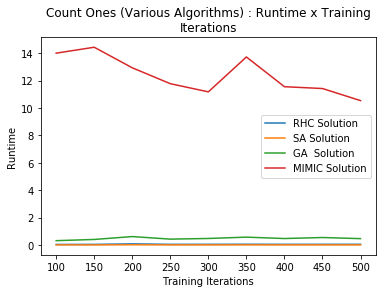

In [38]:
plt.figure()
title = "Count Ones (Various Algorithms) : Runtime x Training Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iteration_list, runtime_RHC, '-', label='RHC Solution')
plt.plot(max_iteration_list, runtime_SM, '-', label='SA Solution')
plt.plot(max_iteration_list, runtime_GA, '-', label='GA  Solution')
plt.plot(max_iteration_list, runtime_MIMIC, '-', label='MIMIC Solution')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Runtime')
filename = 'CountOnes_Runtime.png'
plt.savefig("../plots/" + filename)

In [20]:
# Save everything in pandas dataframe 
cols = ["Max Iterations", "RHC Solution", "SM Solution", "GA Solution", "MIMIC Solution"]

countOnes_df = pd.DataFrame(all_data, columns=cols)
countOnes_df.to_csv("CountOnes_Runtime_data.csv")

In [21]:
print(countOnes_df)

   Max Iterations  RHC Solution  SM Solution  GA Solution  MIMIC Solution
0              20          35.0         32.0         39.0            50.0
1              40          41.0         33.0         37.0            50.0
2              60          42.0         33.0         39.0            50.0
3              80          42.0         34.0         38.0            50.0
4             100          42.0         36.0         37.0            50.0
